In [1]:
%load_ext autoreload
%autoreload 2

# Exploratory data analysis

In [ ]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style('whitegrid')


In [3]:
top_dir = os.path.join('data', '27_eda_agnodice')
fn = os.path.join('..', 'data', 'sRNA', 'Agnodice', 'Agnodice_full_db.txt')
df = pd.read_csv(fn, sep='\t')

In [19]:
df.head()

,publication_PMID,microbe_strain_name,microbe_strain_taxid,microbe_species_name,microbe_species_taxid,microbe_genome_ncbi_id,experimental_method_name,experimental_method_type,experimental_method_group,srna_ncbi_id,...,rna_synonym_names,rna_biotype,rna_product,rbp,microbe_condition,type_of_regulation,srna_coordinates,pairing_alignment,pairing_energy,comments
0,27836995,Escherichia coli O157:H7 str. Sakai,386585.0,Escherichia coli,562,NC_002695.2,CLASH,High-Throughput,Direct,NaN,...,"yhiB,yhhC",mRNA,acid-resistance protein HdeA,RNase E,Exponential phase,NaN,4300306-4300399,NaN,NaN,NaN
1,27836995,Escherichia coli O157:H7 str. Sakai,386585.0,Escherichia coli,562,NC_002695.2,CLASH,High-Throughput,Direct,NaN,...,"B1,H1,virR,topX,topS,pilG,osmZ,msyA,irk,hnsA,b...",mRNA,global DNA-binding transcriptional dual regula...,RNase E,Exponential phase,NaN,4300306-4300399,NaN,NaN,NaN
2,27836995,Escherichia coli O157:H7 str. Sakai,386585.0,Escherichia coli,562,NC_002695.2,CLASH,High-Throughput,Direct,NaN,...,yiiU,mRNA,cell division protein ZapB,RNase E,Exponential phase,NaN,4300306-4300399,NaN,NaN,NaN
3,27836995,Escherichia coli O157:H7 str. Sakai,386585.0,Escherichia coli,562,NC_002695.2,CLASH,High-Throughput,Direct,NaN,...,ychK,mRNA,patatin-like family phospholipase,RNase E,Exponential phase,NaN,2525073-2525175,NaN,NaN,NaN
4,27836995,Escherichia coli O157:H7 str. Sakai,386585.0,Escherichia coli,562,NC_002695.2,CLASH,High-Throughput,Direct,NaN,...,"celB,hic",mRNA,"N,N'-diacetylchitobiose-specific enzyme IIC co...",RNase E,Exponential phase,NaN,572996-573078,NaN,NaN,NaN


In [17]:
df['microbe_condition'] = df['microbe_condition'].apply(lambda x: x.capitalize() if type(x) == str else x)

/tmp/ipykernel_725399/578498688.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df[df[col].isin(order)], order=order, ax=ax, palette='husl')
/tmp/ipykernel_725399/578498688.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df[df[col].isin(order)], order=order, ax=ax, palette='husl')
/tmp/ipykernel_725399/578498688.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df[df[col].isin(order)], order=order, ax=ax, palette='husl')
/tmp/ipykernel_725399/578498688.py:21: FutureWarning: 

Passing `pa

/home/hslab/Olive/Kode/venv_sRNA/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from font(s) Arial.
  func(*args, **kwargs)
/home/hslab/Olive/Kode/venv_sRNA/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


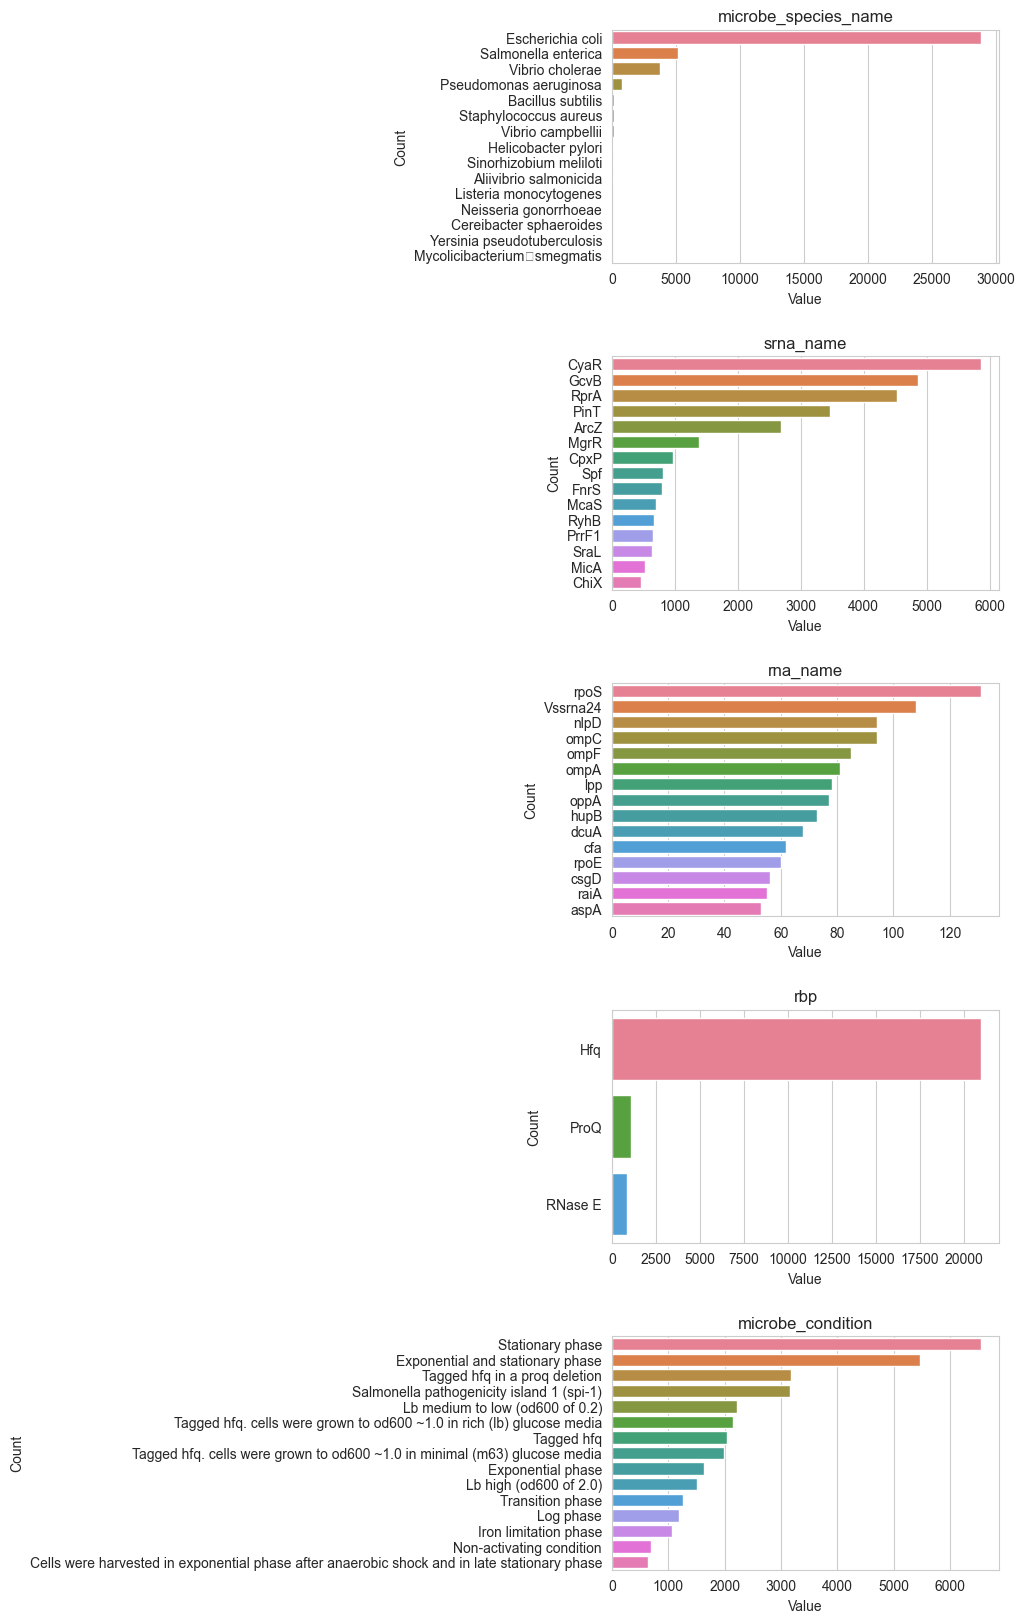

In [43]:
cols_spec = ['microbe_species_name', 'srna_name', 'rna_name', 'rbp', 'microbe_condition']
import seaborn as sns


n = len(cols_spec)
cols_per_row = n
rows = int(np.ceil(n / cols_per_row))

fig, axes = plt.subplots(cols_per_row, rows, figsize=(5 * rows, 4 * cols_per_row))
cols_spec = ['microbe_species_name', 'srna_name', 'rna_name', 'rbp', 'microbe_condition']

top_n = 15
for i, col in enumerate(cols_spec):
    ax = axes[i]
    ax.clear()
    ser = df[col].dropna()
    if pd.api.types.is_numeric_dtype(ser):
        sns.histplot(hue=ser, ax=ax, kde=False, palette='husl', legend=False)
    else:
        order = ser.value_counts().index[:top_n]
        sns.countplot(y=col, data=df[df[col].isin(order)], order=order, ax=ax, palette='husl')
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')


plt.tight_layout()
plt.subplots_adjust(hspace=0.4)

# Hfq

In [53]:
df_rbp_only = df[['srna_name', 'rbp']].drop_duplicates()
perc = (df_rbp_only['rbp'] == 'Hfq').sum() / len(df_rbp_only)
print('The percetnage of known sRNA that bind to Hfq: {:.2f}%'.format(
    100 * perc)
)

The percetnage of known sRNA that bind to Hfq: 47.77%


/tmp/ipykernel_725399/445728802.py:1: RuntimeWarning: Mean of empty slice
  df['pairing_energy_mean_by_srna'] = df.groupby('srna_name')['pairing_energy'].transform(lambda x: np.nanmean(x))
/tmp/ipykernel_725399/445728802.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df[(df['rbp'] == 'Hfq') & (df['pairing_energy'].notna())].sort_values(by='pairing_energy_mean_by_srna'),


Text(0.5, 1.0, 'Distribution of sRNA-RNA binding energy\nfor Hfq-binding sRNAs')

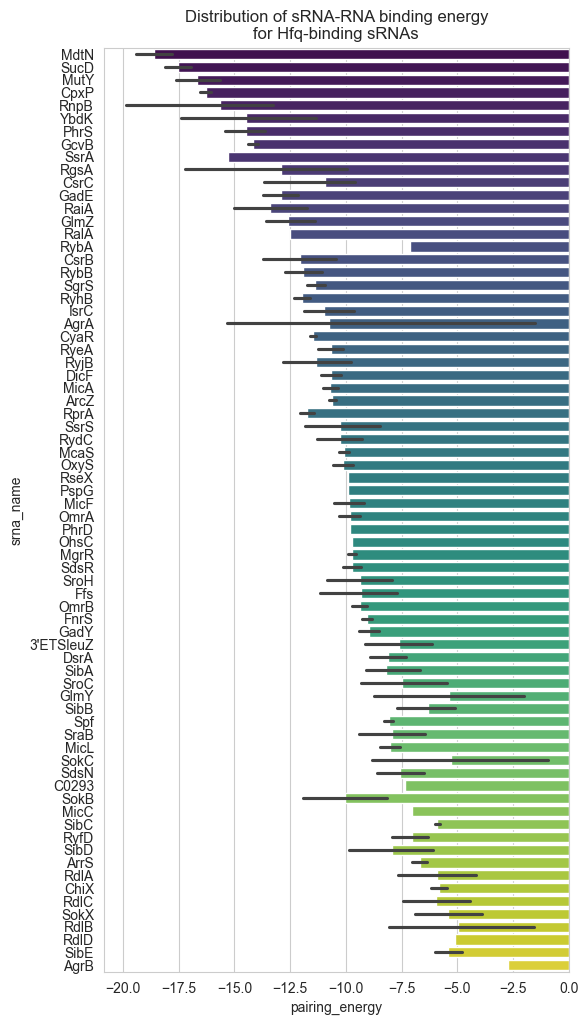

In [ ]:
df['pairing_energy_mean_by_srna'] = df.groupby('srna_name')['pairing_energy'].transform(lambda x: np.nanmean(x))

fig = plt.figure(figsize=(6, 12))
sns.barplot(df[(df['rbp'] == 'Hfq') & (df['pairing_energy'].notna())].sort_values(by='pairing_energy_mean_by_srna'), 
            y='srna_name', x='pairing_energy', palette='viridis')
plt.title('Distribution of sRNA-RNA binding energy\nfor Hfq-binding sRNAs')